Theory of Computation 2023 - Guillermo Zeller

Deliverable Context Free Grammars in Phyton

Please indicate the full names and NIAs of the team members as well as the team number

TEAM: #10

MEMBERS:

	(253885) - Luca Franceschi
	(253048) - Candela Álvarez López
	(254537) - Pau Ametller López

In [65]:
# If using Colaborate then allow Google to use your data files

# CHANGE BEFORE DELIVERING
# from google.colab import drive
# drive.mount('/content/drive')



In [66]:
#cd to the directory in drive you will use (change to your shared folder)

# CHANGE BEFORE DELIVERING
# %cd /content/drive/Shareddrives/ToC-2023/DELIVS/DELIV-1

In [67]:
# CHANGE BEFORE DELIVERING
# !pip install nltk
import nltk
from nltk.grammar import *
from nltk.parse.generate import generate
# !pip install svgling

(1) TODO What are the elements that compose a context-free grammar?

<font color='blue'>A context-free grammar G is composed of (V, Σ, S, R), where:
- V is the set of non-terminal symbols of G.
- Σ is the set of terminal symbols of G.
- S is the starting non-terminal symbol.
- R are the production rules of G, satisfying the CFG rules.</font>

Using the library NLTK we can implement a grammar. See the below example. The instance is create from a string that contains the production rules.
You can find the corresponding documentation on the following links:


1.   https://coli-saar.github.io/cl20/notebooks/CFGs.html
2.   https://www.nltk.org/api/nltk.grammar.html

See the following example on how to create a CFG:

```

grammar = CFG.fromstring("""
S -> A B
A -> 'go to'
B -> 'school' | 'work' | 'gym'
""")
```




(2) TODO Implement a CFG that can generate strings contatenating the action "play" followed by "the piano", "a game" or "football"


In [68]:
#Creation of the CFG
grammar = CFG.fromstring("""
S -> 'play' DN
DN -> 'the piano' | 'a game' | 'football'
""")

(3) TODO Using the function generate you can see all the possible results that your CFG can generate. Note that in a grammar with an recursive link, the results are infinite and therefore can not be shown

```
# list(generate(your_grammar))
```


In [69]:
def print_grammar(grammar, sep=' '):
	generated = list(generate(grammar))
	print('%d strings were generated' % len(generated)) #Print the amount of generated strings
	ret = []
	for l in generated:  #Adds all generated gramar to the list ret
		ret.append(sep.join(l))
	return ret

(4) TODO add more complexity on the CFG add the possibility to add an subjecte to the CFF, in a way that can genereate "I play a game" or "you play football". Generate all the possible strings.

In [70]:
#Creation of the CFG
grammar = CFG.fromstring("""
S -> T 'play' DN
T -> 'I' | 'you'				 
DN -> 'the piano' | 'a game' | 'football'
""")

#Prints the generated grammar
print_grammar(grammar)

6 strings were generated


['I play the piano',
 'I play a game',
 'I play football',
 'you play the piano',
 'you play a game',
 'you play football']

(5) TODO Create a simple CFG that generate the arithemtic expresion for multiplication using only the two integers that can be 1,2 or 3
(E.g 1* 1, 1* 2, 1*3, etc)

In [71]:
#Creation of the CFG
grammar = CFG.fromstring("""
S -> N '*' N
N -> '1' | '2' | '3'
""")

(6) TODO Generate the list of possible strings

In [72]:
#Prints the generated grammar
print_grammar(grammar, sep='')

9 strings were generated


['1*1', '1*2', '1*3', '2*1', '2*2', '2*3', '3*1', '3*2', '3*3']


(7) TODO Create a simple CFG that generate the arithemtic expresion for adding, resting, multiplication, division using only the two integers that can be 1,2 or 3. (E.g 1+1, 1-2, 1*3, 1/1, etc). Note no nesting is requested in this step.



In [73]:
#Creation of the CFG
grammar = CFG.fromstring("""
S -> N '+' N | N '-' N | N '*' N | N '/' N
N -> '1' | '2' | '3'
""")

(8) TODO Generate the list of possible strings

In [74]:
#Prints the generated grammar
print_grammar(grammar, sep='')

36 strings were generated


['1+1',
 '1+2',
 '1+3',
 '2+1',
 '2+2',
 '2+3',
 '3+1',
 '3+2',
 '3+3',
 '1-1',
 '1-2',
 '1-3',
 '2-1',
 '2-2',
 '2-3',
 '3-1',
 '3-2',
 '3-3',
 '1*1',
 '1*2',
 '1*3',
 '2*1',
 '2*2',
 '2*3',
 '3*1',
 '3*2',
 '3*3',
 '1/1',
 '1/2',
 '1/3',
 '2/1',
 '2/2',
 '2/3',
 '3/1',
 '3/2',
 '3/3']

(9) TODO Create a CFG that generate any arithemtic expresion for adding, resting, multiplication, division and can be combined with expresions and parenthesis. Nesting is requested in this case.
Extend the possible integers from 1 to 9
E.g 1+(2*2); (2(3)*2); 1+2+3, etc

In [75]:
#Creation of the CFG
grammar = CFG.fromstring("""
S -> '('S')' | S '+' S | S '-' S | S '*' S | S '/' S | N
N -> '1' | '2' | '3' | '4' | '5' | '6' | '7' | '8' | '9' 
""")

In this case, the functiona generate will not work as probably the CFG has recursive productions. In order to verity if the grammar is correct we can create a generation a derivation tree.

(10) TODO To derivate the operation 1+4 see the following example



```
sent = ['1', '+', '4']
parser = nltk.ChartParser(ar_grammar3)
trees = list(parser.parse(sent))

print(trees[0])

trees[0]
```





(S (S (N 1)) + (S (N 4)))


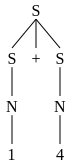

In [76]:
#Verifies that sent is in the grammar
sent = ['1', '+', '4']
parser = nltk.ChartParser(grammar) 
trees = list(parser.parse(sent))

print(trees[0])

trees[0]

(11) TODO check if your grammar can derivate the following operations


1.   2*(2+1)
2.   2/(2/1)
3.   (2* 3)+(2* 2)-1
4.   ((1+2+3)-(1+2))*(2+2)



In [77]:
#Verifies that the strings iare in the grammar
strings = ['2*(2+1)', '2/(2/1)', '(2*3)+(2*2)-1', '((1+2+3)-(1+2))*(2+2)']
operations = [list(s)for s in strings]

trees = []
for op in operations:
	trees.append(list(parser.parse(op)))

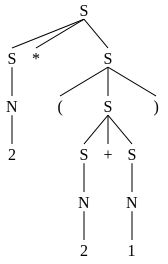

In [78]:
trees[0][0]

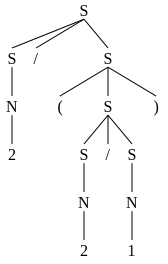

In [79]:
trees[1][0]

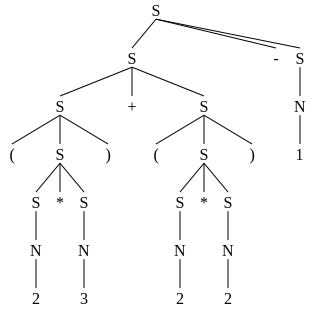

In [80]:
trees[2][0]


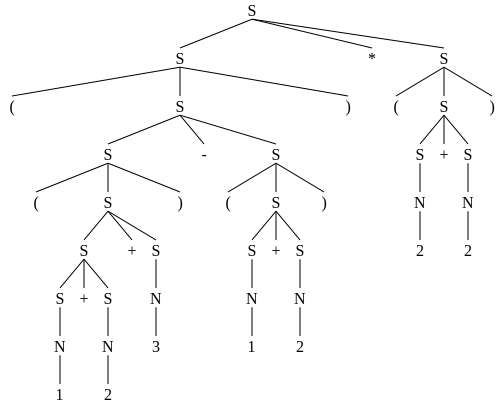

In [81]:
trees[3][0]


Using the methond productions combined with the existing filters, we can obtain a subset of the productions. The filter allow to select by lefthand or righthand of the producion.


```
grammar3.productions(lhs=Nonterminal("A"))
```

(12) TODO On the latest CFG probably there is a production that convert the integer into the actual numbers. Use the method production to obtain ONLY this production. you will need to apply some filters.

Check on the API for reference. https://www.nltk.org/api/nltk.grammar.html

In [82]:
grammar.productions(lhs=Nonterminal('N')) #Retrives all the grammar productions which have as left-hand side the nonterminal N

[N -> '1',
 N -> '2',
 N -> '3',
 N -> '4',
 N -> '5',
 N -> '6',
 N -> '7',
 N -> '8',
 N -> '9']

(13) TODO Obtain only the production that is used to allow parenthesis

In [83]:
grammar.productions(rhs=('(')) ##Retrives all the grammar productions which have as right-hand side first element '('

[S -> '(' S ')']

Context-free grammar are the principle to in the sintaxis analysis for compilers. For example, for a Java code, an specific CFG you can parse the code and evaluate if it follows the sintaxis rules.

(14) TODO Create a context-free grammar that can generate a code with a condition in a programming languange.

*   The condition 'if' can include 'else' or not.
*   The possible expresion in the condition can evaluate three variables var1, var2 and var3 and use the following operators '=', '<' and '>'.
*   After the condition the actions can be callAPI or openFile.
*   It should be possible to nest condition, meaning add an "if" inside of the "if".

Some of the possible codes that can generate:
```
if (var1 = var2) {
  callAPI
}else{
  openFile
}

```
```
if (var1 < var2) {
  callAPI
}

```
```
if (var1 = var2) {
  callAPI
}else{
  if(var1>var3){
    openFile
  }
}
```


In [84]:
##Creation of the CFG
grammar = CFG.fromstring("""
S -> 'if' '(' V C V ')' '{' OP E
E -> '}else{' S '}' | '}else{' OP '}' | '}'
OP -> 'callAPI' | 'openFile'
V -> 'var1' | 'var2' | 'var3'
C -> '=' | '<' | '>'
""")

(15) TODO Do the derivation for the following code

```
code = ['if', '(', 'var1', '=', 'var2', ')', '{','callAPI', '}else{','openFile','}']
```

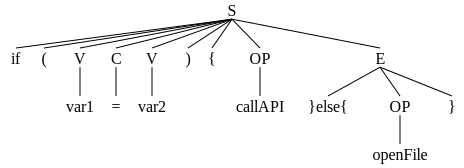

In [85]:
#Verifies that code is in the grammar
code = ['if', '(', 'var1', '=', 'var2', ')', '{','callAPI', '}else{','openFile','}']
parser = nltk.ChartParser(grammar)
tree = list(parser.parse(code))
tree[0]

(16) TODO Create a context-free grammar that can generate a palindrome strings with the characters a, b, r and s.
Check if the following palindroms can be derivated:


1.   aaa
2.   sarabaras
3.   asbsa


In [86]:
strings = ['aaa', 'sarabaras', 'asbsa']

##Creation of the CFG
grammar = CFG.fromstring("""
S -> 'a' S 'a' | 'b' S 'b' | 'r' S 'r' | 's' S 's'
S -> 'a' | 'b' | 'r' | 's' | ''
""")

#Verifies that the strings are in the grammar
parser = nltk.ChartParser(grammar)

In [87]:
pals = [list(s)for s in strings]

trees = []
for pal in pals:
	trees.append(list(parser.parse(pal)))

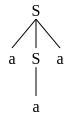

In [88]:
trees[0][0]

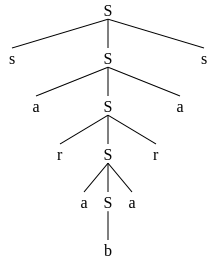

In [89]:
trees[1][0]

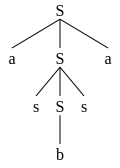

In [90]:
trees[2][0]